# A talk on  SOLID Principles

## at PyDelhi Virtual Meetup

### by Ankush Chander

# What are Design principles?

Design principles are core abstract principles which we are supposed to follow while designing software. Remember they aren't concrete - rather abstract. They can be applied on any language, on any platform regardless of the state as long as we are within the permissible conditions.


# Symptoms of a rotting design

### 1. Rigidity. 
Rigidity is the tendency for software to be difficult to change, even in simple ways. Every change causes a cascade of subsequent changes in dependent modules.  

### 2. Fragility. 
Closely related to rigidity is fragility. Fragility is the tendency of the
software to break in many places every time it is changed.

### 3. Immobility. 
Immobility is the inability to reuse software from other projects or
from parts of the same project.

### 4. Viscosity. 
Viscosity comes in two forms: viscosity of the design, and viscosity of
the environment. When faced with a change, engineers usually find more than one
way to make the change. Some of the ways preserve the design, others do not (i.e.
they are hacks.) When the design preserving methods are harder to employ than the
hacks, then the viscosity of the design is high. It is easy to do the wrong thing, but
hard to do the right thing. 

# SOLID Principles


## 1. Single Responsibility Principle

## 2. Open Closed Principle

## 3. Liskov Substitution Principle

## 4. Interface Segregation Principle

## 5. Dependency Inversion Principle

# 1. Single Responsibility Principle

### A class should have one, and only one, reason to change.

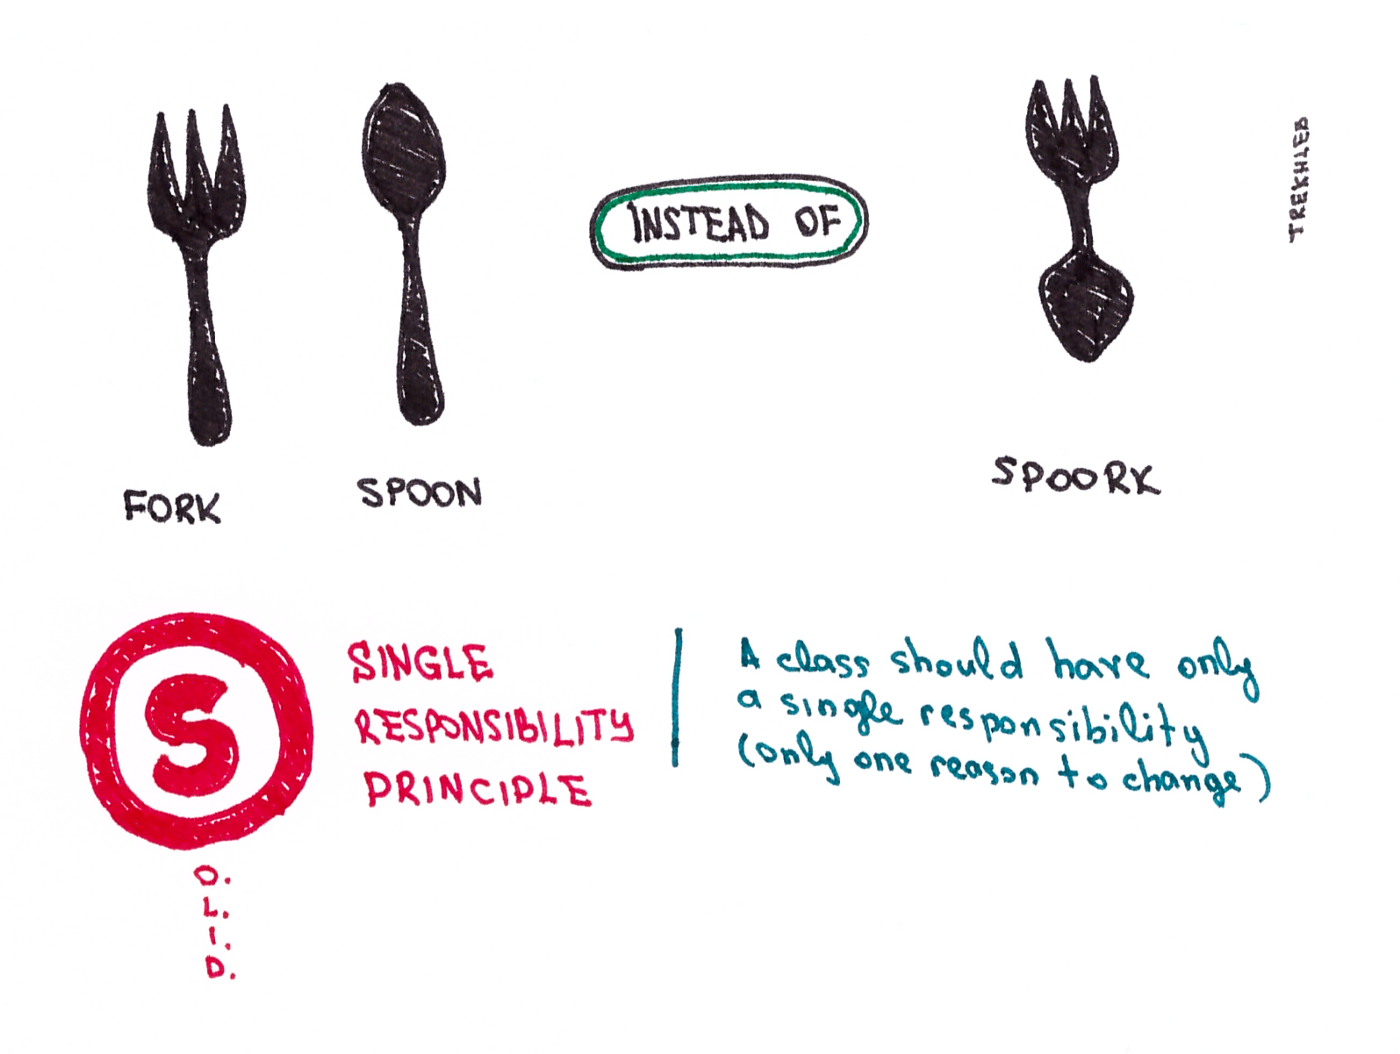

In [59]:
#1/5 SINGLE RESPONSIBILITY PRINCIPLE
# 
from IPython.display import Image

Image("img/srp.png")

In [1]:
#1/5 SINGLE RESPONSIBILITY PRINCIPLE(Voilation)


class Journal():
    def __init__(self):
        self.count=0
        self.items = []
        
    def add_entry(self, entry):
        self.items.append(entry)
        self.count+=1 
    
    def __str__(self):
        return "\n".join(self.items)
    
    # Break single responsibility principle by adding extra responsibilities
    def save(self, filename):
        with open(filename, "w+") as fp:
            fp.write(str(self))
    
    def load(self, filename):
        pass
        

journal = Journal()
journal.add_entry("I learnt design patterns today.")
journal.add_entry("I gave a talk today.")
print(journal)


journal.save("myjournal.txt")


with open("myjournal.txt", "r") as fp:
    content= fp.read()
    print(content)
    

I learnt design patterns today.
I gave a talk today.
I learnt design patterns today.
I gave a talk today.


In [7]:
#1/5 SINGLE RESPONSIBILITY PRINCIPLE(The right way)

class Journal():
    def __init__(self):
        self.count=0
        self.items = []
        
    def add_entry(self, entry):
        self.items.append(entry)
        self.count+=1 
    
    def __str__(self):
        return "\n".join(self.items)


# Seperate Persistance logic from journal logic
class PersistanceManager():
    @staticmethod
    def save(journal, filename):
        with open(filename, "w+") as fp:
            fp.write(str(journal))

    def load(filename):
        journal = Journal()
        with open(filename, "r") as fp:
            for line in fp.readlines():
                journal.add_entry(line.strip())
        return journal

journal = Journal()
journal.add_entry("I learnt design patterns today.")
journal.add_entry("I gave a talk today.")
print(f"journal entrues:\n{journal}")


PersistanceManager.save(journal, "myjournal_p.txt")

journal_loaded = PersistanceManager.load("myjournal_p.txt")
print(f"loaded from PersistanceManager:\n{journal_loaded}")



journal entrues:
I learnt design patterns today.
I gave a talk today.
loaded from PersistanceManager:
I learnt design patterns today.
I gave a talk today.


## 2. Open Closed Principle

### A module should be open for extension but closed for modification.

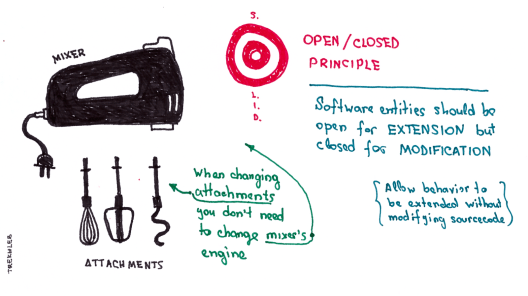

In [56]:
# Open closed principle
Image("img/open_closed_principle.png")

In [8]:
# Open closed principle(Voilation)
from enum import Enum


class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3


class Size(Enum):
    SMALL = 1
    MEDIUM = 2
    LARGE = 3


class Product:
    def __init__(self, name, color, size):
        self.name = name
        self.color = color
        self.size = size


class ProductFilter:
    
    # state space explosion
    # 3 criteria
    # c s w cs sw cw csw = 7 methods
    # Bad because addition of criterian will require modification of this class  
    def filter_by_color(self, products, color):
        for p in products:
            if p.color == color: yield p

    def filter_by_size(self, products, size):
        for p in products:
            if p.size == size: yield p

    def filter_by_size_and_color(self, products, size, color):
        for p in products:
            if p.color == color and p.size == size:
                yield p




apple = Product('Apple', Color.GREEN, Size.SMALL)
tree = Product('Tree', Color.GREEN, Size.LARGE)
house = Product('House', Color.BLUE, Size.LARGE)

products = [apple, tree, house]

pf = ProductFilter()
print('Green products (old):')
for p in pf.filter_by_color(products, Color.GREEN):
    print(f' - {p.name} is green')



Green products (old):
 - Apple is green
 - Tree is green


In [13]:
# Open closed principle(Better alternative)

from enum import Enum


class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3


class Size(Enum):
    SMALL = 1
    MEDIUM = 2
    LARGE = 3


class Product:
    def __init__(self, name, color, size):
        self.name = name
        self.color = color
        self.size = size


    
# OCP = open for extension, closed for modification


class Specification:
    def is_satisfied(self, item):
        pass

    # and operator makes life easier
    def __and__(self, other):
        return AndSpecification(self, other)


class ColorSpecification(Specification):
    def __init__(self, color):
        self.color = color

    def is_satisfied(self, item):
        return item.color == self.color


class SizeSpecification(Specification):
    def __init__(self, size):
        self.size = size

    def is_satisfied(self, item):
        return item.size == self.size


class AndSpecification(Specification):
    def __init__(self, *args):
        self.args = args

    def is_satisfied(self, item):
        return all(map(
            lambda spec: spec.is_satisfied(item), self.args))



# class AndSpecification(Specification):
#     def __init__(self, spec1, spec2):
#         self.spec2 = spec2
#         self.spec1 = spec1
#
#     def is_satisfied(self, item):
#         return self.spec1.is_satisfied(item) and \
#                self.spec2.is_satisfied(item)


class Filter:
    def filter(self, items, spec):
        pass


# Class that follows Open Closed Principle
class BetterFilter(Filter):
    def filter(self, items, spec):
        for item in items:
            if spec.is_satisfied(item):
                yield item


apple = Product('Apple', Color.GREEN, Size.SMALL)
tree = Product('Tree', Color.GREEN, Size.LARGE)
house = Product('House', Color.BLUE, Size.LARGE)

products = [apple, tree, house]

# v AFTER
bf = BetterFilter()

print('Green products (new):')
green = ColorSpecification(Color.GREEN)
for p in bf.filter(products, green):
    print(f' - {p.name} is green')

print('Large products:')
large = SizeSpecification(Size.LARGE)
for p in bf.filter(products, large):
    print(f' - {p.name} is large')

print('Large blue items:')
# large_blue = AndSpecification(large, ColorSpecification(Color.BLUE))
large_blue = large & ColorSpecification(Color.BLUE)
for p in bf.filter(products, large_blue):
    print(f' - {p.name} is large and blue')

Green products (new):
 - Apple is green
 - Tree is green
Large products:
 - Tree is large
 - House is large
Large blue items:
 - House is large and blue


# 3. Liskov Substitution Principle

### Subclasses should be substitutable for their base classes.

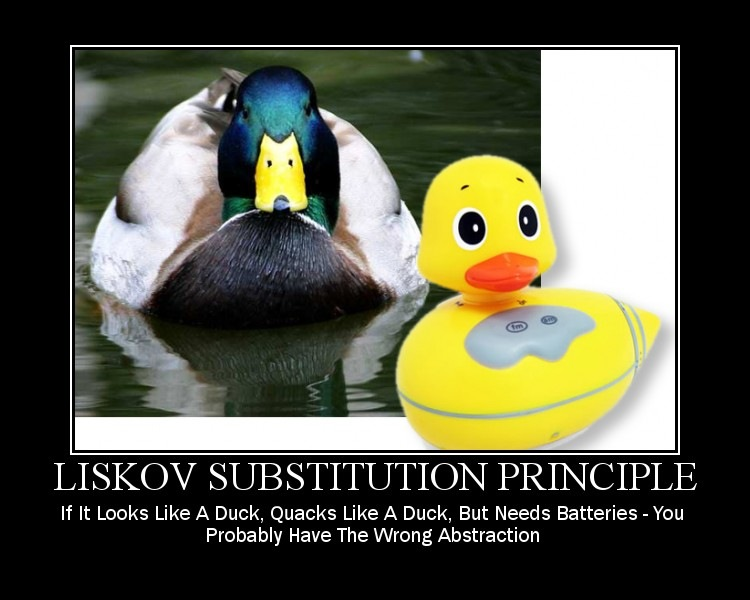

In [3]:
from IPython.display import Image
Image("img/lsp.jpg")

In [14]:

class Rectangle:
    def __init__(self, width,height):
        self._width = width
        self._height = height
    
    @property
    def area(self):
        return self._width * self._height
    
    @property
    def width(self):
        return self._width
    
    @width.setter
    def width(self, value):
        self._width = value

    @property
    def height(self):
        return self._height
    
    @height.setter
    def height(self, value):
        self._height = value
        

def use_it(rc):
    w = rc.width
    rc.height = 10
    expected = int(w*10)
    print(f"expected: {expected}, got {rc.area}")
    
    
if __name__=="__main__":
    rc = Rectangle(2, 5)
    use_it(rc)

expected: 20, got 20


In [15]:
# Liskov substitution Principle(Voilation)

class Square(Rectangle):
    def __init__(self, size):
        Rectangle.__init__(self,size, size)
    
    @Rectangle.height.setter
    def height(self, value):
        self._height = value
        self._width = value
    
    @Rectangle.width.setter
    def width(self, value):
        self._width = value
        self._height = value
        
        
        
if __name__=="__main__":
    sq = Square(5)
    use_it(sq)


expected: 50, got 100


# 4. Interface Segregation Principle

### Many client specific interfaces are better than one general purpose interface.


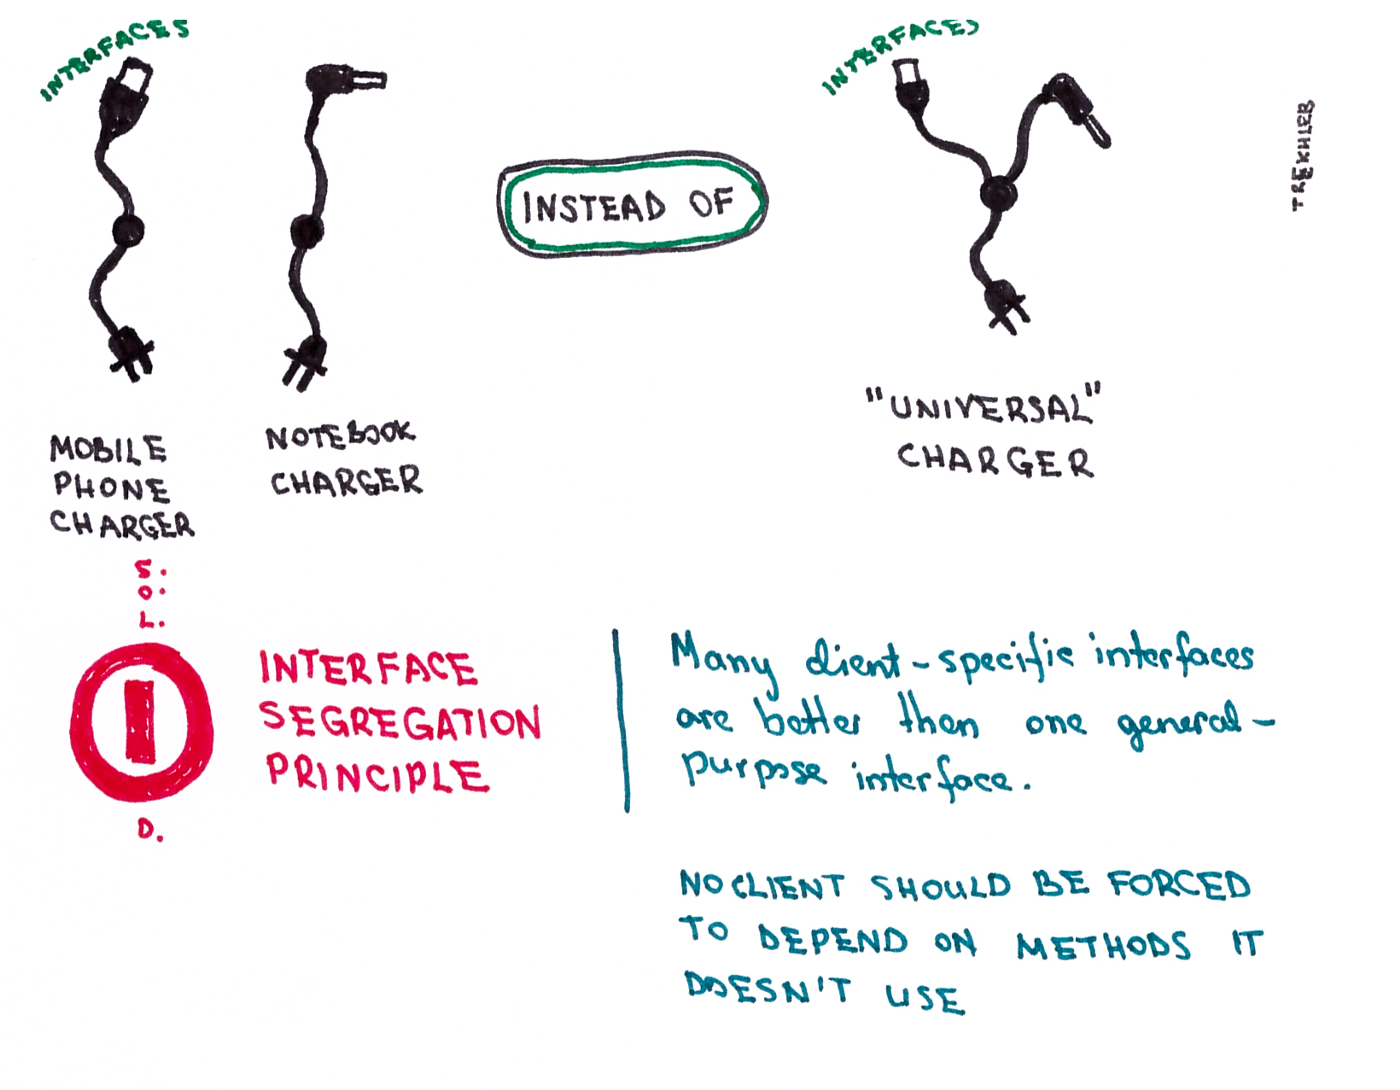

In [2]:
from IPython.display import Image
Image("img/isp.png")

In [16]:
# Interface Segregation Principle (Voilation)

from abc import abstractmethod


class Machine:
    def print(self, document):
        raise NotImplementedError()

    def fax(self, document):
        raise NotImplementedError()

    def scan(self, document):
        raise NotImplementedError()


# ok if you need a multifunction device
class MultiFunctionPrinter(Machine):
    def print(self, document):
        pass

    def fax(self, document):
        pass

    def scan(self, document):
        pass


class OldFashionedPrinter(Machine):
    def print(self, document):
        # ok - print stuff
        pass

    def fax(self, document):
        pass  # do-nothing

    def scan(self, document):
        """Not supported!"""
        raise NotImplementedError('Printer cannot scan!')


In [ ]:
# Interface Segregation Principle (Better alternative)

class Printer:
    @abstractmethod
    def print(self, document):
        pass


class Scanner:
    @abstractmethod
    def scan(self, document):
        pass


# same for Fax, etc.

class MyPrinter(Printer):
    def print(self, document):
        print(document)


class Photocopier(Printer, Scanner):
    def print(self, document):
        print(document)

    def scan(self, document):
        pass  # something meaningful


class MultiFunctionDevice(Printer, Scanner):  # , Fax, etc
    @abstractmethod
    def print(self, document):
        pass

    @abstractmethod
    def scan(self, document):
        pass


class MultiFunctionMachine(MultiFunctionDevice):
    def __init__(self, printer, scanner):
        self.printer = printer
        self.scanner = scanner

    def print(self, document):
        self.printer.print(document)

    def scan(self, document):
        self.scanner.scan(document)


# Dependency Inversion Principle

### Higher level modules should not depend on lower level modules. They should both follow abstractions.

### Abstraction should not depend on details, details should depend on abstraction.

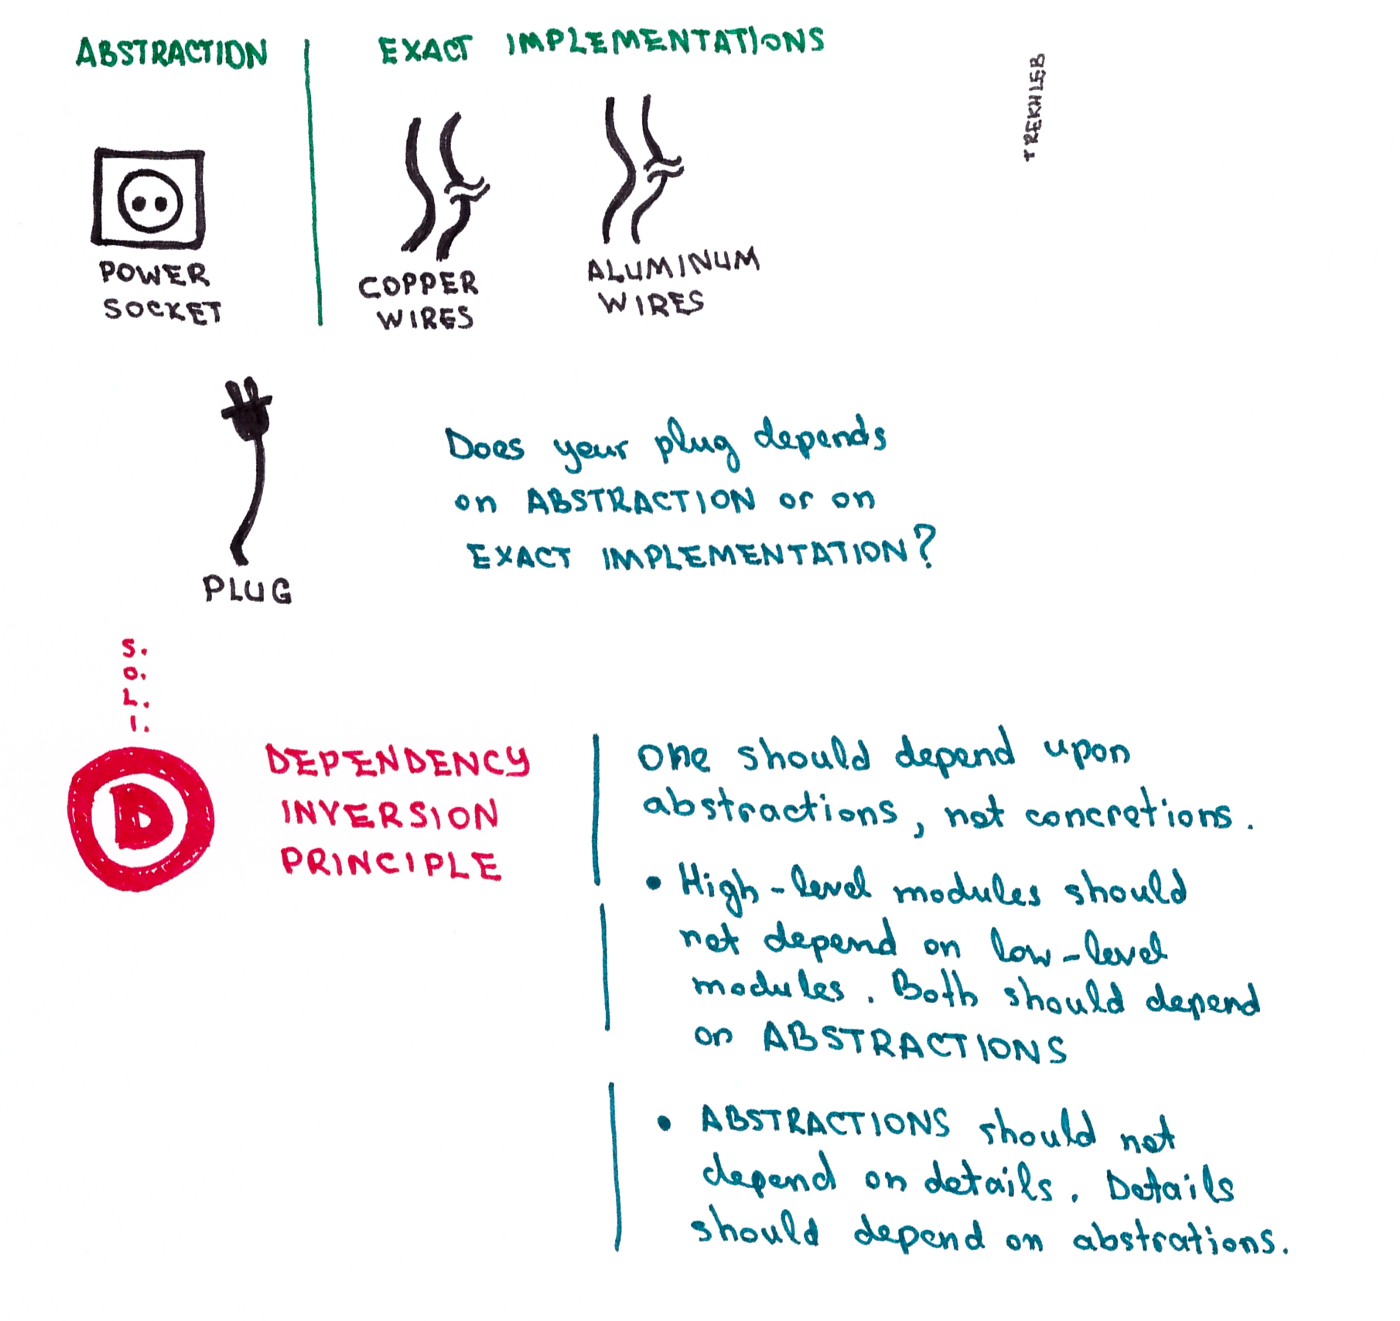

In [17]:
# Dependency Inversion Principle
# 1. Not to be confused with dependency injection
from IPython.display import Image
Image("img/dip.png")

In [16]:
# Depencdency Inversion Principle (Voilation)
from abc import abstractmethod
from enum import Enum


class Relationship(Enum):
    PARENT = 0
    CHILD = 1
    SIBLING = 2


class Person:
    def __init__(self, name):
        self.name = name




class Relationships():  # low-level
    relations = []

    def add_parent_and_child(self, parent, child):
        # low level storage detail. 
        #  relationships are stored in a tuple form (x, parent, y) denotes x is a parent of y.       
        self.relations.append((parent, Relationship.PARENT, child))
        self.relations.append((child, Relationship.CHILD, parent))
            

class Research:
    # dependency on a low-level module directly
    # bad because strongly dependent on e.g. storage type

    def __init__(self, relationships):
        # high-level: find all of john's children
        relations = relationships.relations
        for r in relations:
            if r[0].name == 'John' and r[1] == Relationship.PARENT:
                print(f'John has a child called {r[2].name}.')


parent = Person('John')
child1 = Person('Chris')
child2 = Person('Matt')

# low-level module
relationships = Relationships()
relationships.add_parent_and_child(parent, child1)
relationships.add_parent_and_child(parent, child2)

Research(relationships)

John has a child called Chris.
John has a child called Matt.


In [17]:
# Depencdency Inversion Principle (Better alternative)

from abc import abstractmethod
from enum import Enum


class Relationship(Enum):
    PARENT = 0
    CHILD = 1
    SIBLING = 2


class Person:
    def __init__(self, name):
        self.name = name


class RelationshipBrowser:
    @abstractmethod
    def find_all_children_of(self, name):
        pass


class Relationships(RelationshipBrowser):  # low-level
    relations = []

    def add_parent_and_child(self, parent, child):
        self.relations.append((parent, Relationship.PARENT, child))
        self.relations.append((child, Relationship.PARENT, parent))
            
    def find_all_children_of(self, name):
        for r in self.relations:
            if r[0].name == name and r[1] == Relationship.PARENT:
                yield r[2].name


class Research:
  
    # better because it relies on abstraction.
    def __init__(self, browser):
        for p in browser.find_all_children_of("John"):
            print(f'John has a child called {p}')


parent = Person('John')
child1 = Person('Chris')
child2 = Person('Matt')

# low-level module
relationships = Relationships()
relationships.add_parent_and_child(parent, child1)
relationships.add_parent_and_child(parent, child2)

Research(relationships)

John has a child called Chris
John has a child called Matt


# References: 
 http://www.cvc.uab.es/shared/teach/a21291/temes/object_oriented_design/materials_adicionals/principles_and_patterns.pdf

https://www.udemy.com/course/design-patterns-python# https://hackernoon.com/the-open-closed-principle-c3dc45419784

https://en.wikipedia.org/wiki/SOLID

https://medium.com/@trekhleb/solid-principles-around-you-6db2f0e12139

https://stackoverflow.com/questions/31317141/whats-the-difference-between-design-patterns-and-design-principles